# The Billionaire Problem

In recent years, billionaires have gone from objects of admiration to outright villians in certain political and social circles. The (over?)simplified idea is that we have "a billionaire problem" in our society, i.e. they are a sign of massive income/wealth inequality and a failure of capitalism to provide general prosperity. Is this true? This notebook interrogates that question.



In [13]:
# Import the necessary modules for this notebook

from pprint import pprint

import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt


## Billionaires vs. Unions

> *Billionaires don't make money. They take money.*
>
> — Alexandria Ocasio-Cortez

The explanation AOC offered to support statement is that billionaires have made their wealth largely by suppressing wages. In short, they are able to *take* more than their fair share of revenues, inflate their profits, thus building their net worth unfairly. (It is out of scope of this notebook to examine why this analysis of how labor markets work is problematic. I'm limiting the discussion only to the wages question.) 

Taking this explanation seriously, a reasonable hypothesis would be that where collective agreement coverage is low, wages are suppressed because workers lack the union power to offset the power of billionaires to set wages to their liking. So collective agreement coverage or union representation is a key variable to analyze. Collective agreement coverage refers to the proportion of people in a country's population whose terms and conditions at work are made by collective bargaining, between an employer and a trade union, rather than by individual contracts.[^1]

Let's see if the data bear some of this out. We turn to the Wikipedia page on [Collective Agreement Coverage](https://en.wikipedia.org/wiki/Collective_agreement_coverage) to extract the data.

In [14]:
# Parse the Collective Agreement Coverage page
with requests.get("https://en.wikipedia.org/wiki/Collective_agreement_coverage") as response:
    soup = BeautifulSoup(response.content, "html.parser")

# Find the table with the data we want
cac_table = soup.find(string='Collective bargaining coverage in OECD countries').find_parent('table')

# Extract the rows of the table as a list of strings
rows = [str(row) for row in cac_table.find_all('tr')[:5]]  # Adjust the number 5 to see more or fewer rows
rows

['<tr>\n<th>Country</th>\n<th>Coverage (%)</th>\n<th>Year\n</th></tr>',
 '<tr>\n<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="640" data-file-width="1280" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/40px-Flag_of_Australia_%28converted%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/60px-Flag_of_Australia_%28converted%29.svg.png 2x" width="23"/></span></span>\xa0</span><a href="/wiki/Australia" title="Australia">Australia</a></td>\n<td>61.2</td>\n<td>2018\n</td></tr>',
 '<tr>\n<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/23px-Flag_of_Austria.sv

In [15]:
# Create dataframe from the table
cac_df = pd.concat(pd.read_html(str(cac_table), flavor="bs4"))
cac_df

,Country,Coverage (%),Year
0,Australia,61.2,2018
1,Austria,98.0,2019
2,Belgium,96.0,2019
3,Canada,31.3,2020
4,Chile,20.4,2018
5,Colombia,15.7,2016
6,Czech Republic,34.7,2019
7,Denmark,82.0,2018
8,Estonia,19.1,2021
9,Finland,88.8,2017


In [16]:
#
# Cleanup the dataframe
#

# Remove the average
cac_df.drop(cac_df[ cac_df.Country.str.contains('OECD average') ].index, inplace=True)

# Index by country
cac_df.set_index("Country", inplace=True)

# Sort the rows
cac_df.sort_values("Coverage (%)", ascending=False, inplace=True)

cac_df 

,Coverage (%),Year
Country,,
Italy,100.0,2019
Austria,98.0,2019
France,98.0,2018
Belgium,96.0,2019
Iceland,90.0,2019
Finland,88.8,2017
Sweden,88.0,2018
Denmark,82.0,2018
Spain,80.1,2018


<AxesSubplot: xlabel='Coverage (%)', ylabel='Country'>

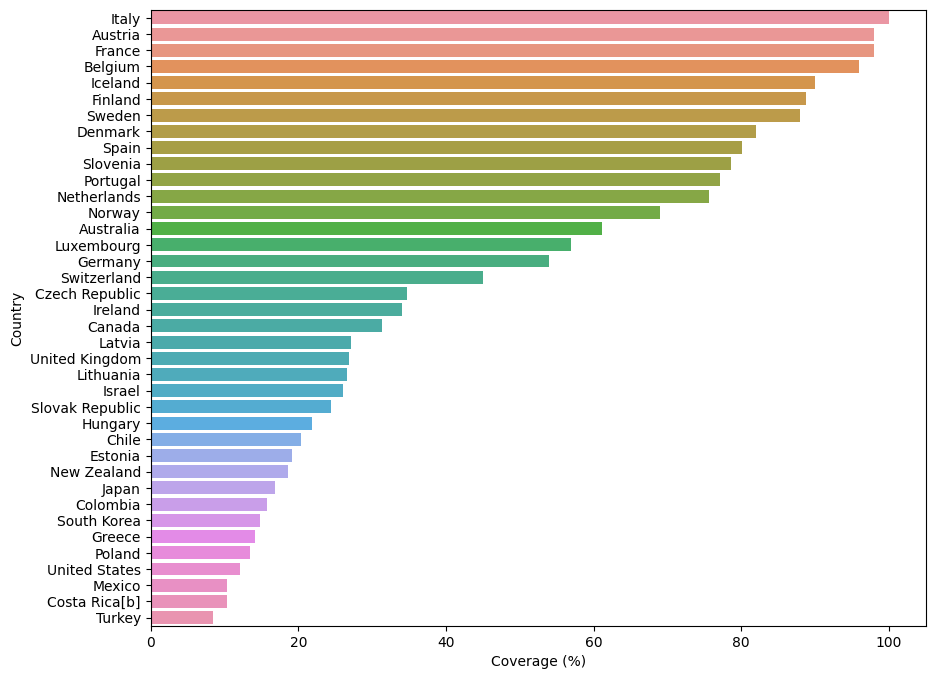

In [17]:
# Visualize coverage by country
plt.figure(figsize=(10,8))
sns.barplot(data=cac_df, x=cac_df['Coverage (%)'], y=cac_df.index, orient="h")

### Unionization Data Issues
As we can see from the summarized data in Wikipedia, the various coverage rates were *not* collected in the same year. An examination of [the original data](https://stats.oecd.org/Index.aspx?DataSetCode=CBC#) reveals that they were not consistently collected year after year. A solution to this problem is by making a simplifying assumption that unionization is relatively stable over the short term and classify countries into buckets of unionization to organize our data.

In [18]:
# Create a classification feature based on bins of Coverage (%) feature
cac_df['Unionization'] = pd.cut(cac_df['Coverage (%)'], range(0, 105, 20), labels=['VERY WEAK', 'WEAK', 'NEUTRAL', 'STRONG', 'VERY STRONG'])
cac_df

,Coverage (%),Year,Unionization
Country,,,
Italy,100.0,2019,VERY STRONG
Austria,98.0,2019,VERY STRONG
France,98.0,2018,VERY STRONG
Belgium,96.0,2019,VERY STRONG
Iceland,90.0,2019,VERY STRONG
Finland,88.8,2017,VERY STRONG
Sweden,88.0,2018,VERY STRONG
Denmark,82.0,2018,VERY STRONG
Spain,80.1,2018,VERY STRONG


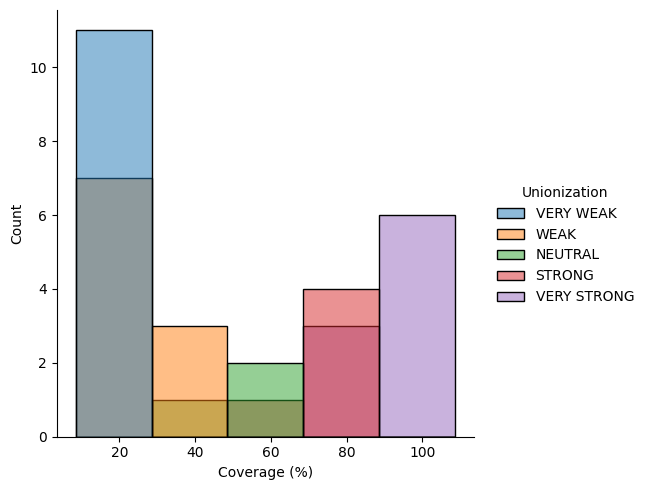

In [19]:
# Visualize the categories
sns.displot(data=cac_df, x=cac_df['Coverage (%)'], binwidth=20, hue=cac_df['Unionization'])

### Retrieve Billionaires by Country

Now that we have a unionization, let's scrape [billionaire data from Wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_number_of_billionaires) for merging with the unionization data.

In [20]:
# Parse the List of countries by number of billionaires page
with requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_number_of_billionaires") as response:
    soup = BeautifulSoup(response.content, "html.parser")
    
# Find the table with the data we want
b9_table = soup.find(string=' (April 2024)').find_parent(name='table')

# Extract the rows of the table as a list of strings
rows = [str(row) for row in b9_table.find_all('tr')[:5]]  # Adjust the number 5 to see more or fewer rows
rows

['<tr>\n<th>Rank\n</th>\n<th>Rank per <br/> capita\n</th>\n<th>Country/Territory\n</th>\n<th>Billionaires\n</th>\n<th><abbr title="Billionaires per million people">Rate</abbr>\n</th></tr>',
 '<tr>\n<th>\n</th>\n<th>-\n</th>\n<td><b><span class="flagicon" style="padding-left:25px;">\xa0</span>World</b></td>\n<td align="center">2,781</td>\n<td align="center">0.343\n</td></tr>',
 '<tr>\n<th>1\n</th>\n<th>11\n</th>\n<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/40px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/60px-Flag_of_the_United_States.svg.png 2x" width="23"/></span></span>\xa0</span><a href="/wiki/United_States" title="United States">United States</a></td>\n<td align="center">813</td>\n<

In [21]:
# Create dataframe from the table
b9_df = pd.concat(pd.read_html(str(b9_table), flavor="bs4"))
b9_df

,Rank,Rank per capita,Country/Territory,Billionaires,Rate
0,NaN,-,World,2781,0.343
1,1.0,11,United States,813,2.420
2,2.0,53,China,406,0.288
3,3.0,58,India,200,0.144
4,4.0,17,Germany,132,1.560
...,...,...,...,...,...
74,60.0,75,Bangladesh,1,0.006
75,60.0,12,Belize,1,2.265
76,60.0,54,Croatia,1,0.259
77,60.0,18,Luxembourg,1,1.513


In [22]:
#
# Cleanup billionaire dataframe
#

# Drop empties
b9_df.dropna(inplace=True)

# Rename columns
b9_df.rename(columns={'Country/Territory': 'Country'}, inplace=True)

# Set Country as index
b9_df.set_index('Country', inplace=True)

b9_df

,Rank,Rank per capita,Billionaires,Rate
Country,,,,
United States,1.0,11,813,2.420
China,2.0,53,406,0.288
India,3.0,58,200,0.144
Germany,4.0,17,132,1.560
Russia,5.0,27,120,0.821
...,...,...,...,...
Bangladesh,60.0,75,1,0.006
Belize,60.0,12,1,2.265
Croatia,60.0,54,1,0.259


### Merge Data and Exploratory Analsis

Now let's merge the data by country, sort on billionaires per capita, and look at the top 10 countries.

In [25]:
df = cac_df.merge(b9_df, left_index=True, right_index=True)
df.sort_values('Billionaires', ascending=False).head(10)

,Coverage (%),Year,Unionization,Rank,Rank per capita,Billionaires,Rate
Country,,,,,,,
United States,12.1,2020,VERY WEAK,1.0,11,813,2.420
Germany,54.0,2018,NEUTRAL,4.0,17,132,1.560
Italy,100.0,2019,VERY STRONG,6.0,21,73,1.239
Canada,31.3,2020,WEAK,8.0,16,67,1.643
United Kingdom,26.9,2019,WEAK,10.0,29,55,0.814
France,98.0,2018,VERY STRONG,11.0,31,53,0.775
Australia,61.2,2018,STRONG,13.0,15,48,1.790
Sweden,88.0,2018,VERY STRONG,14.0,7,43,4.075
Japan,16.8,2019,VERY WEAK,15.0,47,41,0.331


In [27]:
df.sort_values('Billionaires', ascending=False).head(10)

,Coverage (%),Year,Unionization,Rank,Rank per capita,Billionaires,Rate
Country,,,,,,,
United States,12.1,2020,VERY WEAK,1.0,11,813,2.420
Germany,54.0,2018,NEUTRAL,4.0,17,132,1.560
Italy,100.0,2019,VERY STRONG,6.0,21,73,1.239
Canada,31.3,2020,WEAK,8.0,16,67,1.643
United Kingdom,26.9,2019,WEAK,10.0,29,55,0.814
France,98.0,2018,VERY STRONG,11.0,31,53,0.775
Australia,61.2,2018,STRONG,13.0,15,48,1.790
Sweden,88.0,2018,VERY STRONG,14.0,7,43,4.075
Japan,16.8,2019,VERY WEAK,15.0,47,41,0.331


As we can see, the picture is not quite as clear cut as the AOC's (in)famous quote might lead us to believe. On first blush, it appears that unionized countries produce billionaires at high rates. Sweden, Iceland and Norway with their high unionization rates all beat the U.S. The data don't support the assertion that billionaires are "taking money" so far.

## Footnotes

[^1]: https://en.wikipedia.org/wiki/Collective_agreement_coverage